In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [2]:
import desispec.io
import desisim.io
import desisim.templates

In [3]:
%matplotlib inline

In [4]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [5]:
import specsim.simulator

In [6]:
desi = specsim.simulator.Simulator('desi', num_fibers=500, verbose=True)

Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky-bright.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky-grey.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/ZenithExtinction-KPNO.dat with args {'format': 'ascii'}
Loaded 667 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/sky/solarspec.txt with args {'format': 'ascii.basic'}
Atmosphere initialized with condition 'dark' from dict_keys(['bright', 'dark', 'grey']).
Seeing is 1.1 arcsec at 6355.0 Angstrom with Moffat beta 3.5.
Lunar V-band extinction coefficient is 0.15154.
Loaded 4761 row

In [7]:
desi = specsim.simulator.Simulator('desi', num_fibers=100, verbose=True)

Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky-bright.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/spec-sky-grey.dat with args {'format': 'ascii'}
Loaded 65000 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/spectra/ZenithExtinction-KPNO.dat with args {'format': 'ascii'}
Loaded 667 rows from /global/common/cori/contrib/desi/desiconda/current/code/desimodel/master/data/sky/solarspec.txt with args {'format': 'ascii.basic'}
Atmosphere initialized with condition 'dark' from dict_keys(['bright', 'dark', 'grey']).
Seeing is 1.1 arcsec at 6355.0 Angstrom with Moffat beta 3.5.
Lunar V-band extinction coefficient is 0.15154.
Loaded 4761 row

In [8]:
help(desi.simulate)

Help on method simulate in module specsim.simulator:

simulate(sky_positions=None, focal_positions=None, fiber_acceptance_fraction=None, source_fluxes=None, source_types=None, source_fraction=None, source_half_light_radius=None, source_minor_major_axis_ratio=None, source_position_angle=None, calibration_surface_brightness=None, save_fiberloss=None) method of specsim.simulator.Simulator instance
    Simulate a single exposure.
    
    Simulation results are written to internal tables that are overwritten
    each time this method is called.  Some metadata is also saved as
    attributes of this object: `focal_x`, `focal_y`, `fiber_area`.
    
    The positions and properties of each source can optionally be specified
    individually for each fiber via array arguments.  Any parameters that
    are not specified this way will use the same value for each fiber
    taken from the configuration data, as noted below.
    
    Fibers are positioned using either (x,y) focal-plane coordinates


In [9]:
simwave = desi.simulated['wavelength']

In [10]:
import desisim

In [11]:
starmaker = desisim.templates.MWS_STAR(wave=simwave)

INFO:io.py:967:read_basis_templates: Reading /global/project/projectdirs/desi/spectro/templates/basis_templates/v2.3/star_templates_v2.1.fits


In [12]:
starfluxes,starwaves,starmetas = starmaker.make_templates(rmagrange=(7,18))

In [13]:
starfluxes.shape

(100, 63001)

In [14]:
starmetas[0]

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,nanomaggies,nanomaggies,nanomaggies,nanomaggies,nanomaggies,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,str10,int32,int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
MWS_STAR,,344,1272508901,-0.00167407798393,12.2623,3537.94,12447.2,40587.0,43542.8,25159.4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3500.0,1.0,-2.0


In [15]:
gmag = -2.5*np.log10(starmetas['FLUX_G'])+22.5

In [16]:
rmag = -2.5*np.log10(starmetas['FLUX_R'])+22.5

In [17]:
gmr = gmag-rmag

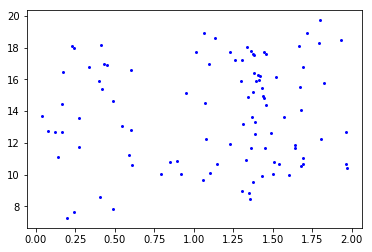

In [18]:
plt.plot(gmr,gmag,'bo',ms=3,mew=0)

In [19]:
profs = np.repeat('star',100)

In [20]:
profs.shape

(100,)

In [21]:
profs[0:2]

array(['star', 'star'], 
      dtype='<U4')

In [22]:
starfluxes[0,0:5]

array([ 196.26001419,  203.16873327,  222.77464299,  244.11858667,
        262.1352187 ])

In [23]:
starfluxes=starfluxes*6e-17 * u.erg / (u.Angstrom * u.s * u.cm ** 2)

In [24]:
desi.simulate(source_fluxes=starfluxes,source_types=profs)

All fibers positioned at config (x,y).


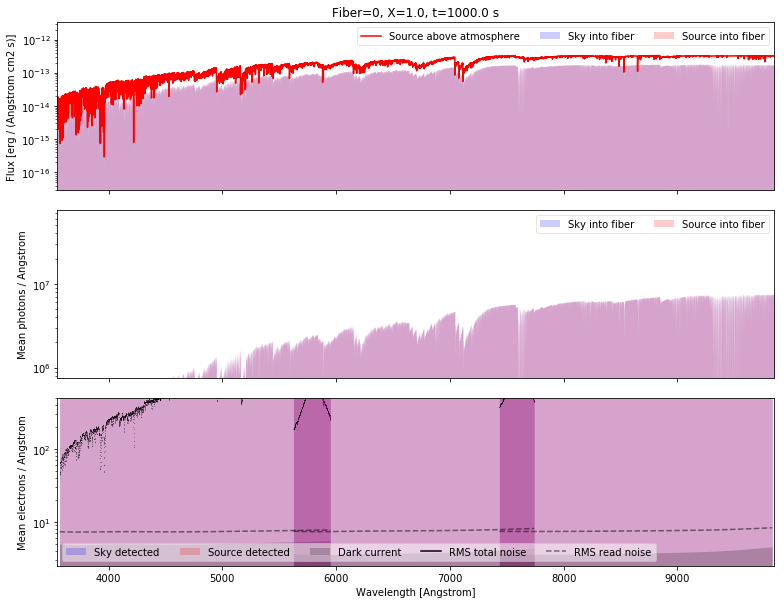

In [25]:
desi.plot(fiber=0)

In [26]:
help(desi.observation)

Help on Observation in module specsim.observation object:

class Observation(builtins.object)
 |  Model the parameters describing a single spectroscopic observation.
 |  
 |  The following parameters can be changed after an Observation object has
 |  been created: exposure_time, exposure_start, pointing.
 |  
 |  Parameters
 |  ----------
 |  location : astropy.coordinates.EarthLocation
 |      Observatory location on the surface of the earth.
 |  exposure_time : astropy.units.Quantity
 |      Open shutter exposure time for this observation.
 |  exposure_start : astropy.time.Time
 |      Time when the shutter opens and the exposure starts.
 |  pointing : astropy.coordinates.SkyCoord
 |      Sky position where the telescope boresight is pointing during the
 |      observation.
 |  wavelength : astropy.units.Quantity
 |      Array of wavelength bin centers where the simulated spectrum is
 |      calculated, with units.
 |  pressure : astropy.units.Quantity
 |      Used to create an :func

In [27]:
desi.observation.exposure_time

<Quantity 1000.0 s>

AttributeError: 'Simulator' object has no attribute 'simulator'

In [232]:
help(desi.instrument)

Help on Instrument in module specsim.instrument object:

class Instrument(builtins.object)
 |  Model the instrument response of a fiber spectrograph.
 |  
 |  A spectrograph can have multiple :mod:`cameras <specsim.camera>` with
 |  different wavelength coverages. Objects representing each camera are
 |  contained in a list accessible from our ``cameras`` attribute, which will
 |  be in order of increasing effective wavelength.
 |  
 |  No instrument attributes can be changed after an instrument has been
 |  created. Create a github issue if you would like to change this.
 |  
 |  Parameters
 |  ----------
 |  name : str
 |      Descriptive name of this instrument.
 |  wavelength : astropy.units.Quantity
 |      Array of wavelength bin centers where the instrument response is
 |      calculated, with units.
 |  fiberloss_method : str
 |      Must be "table" or "galsim" or "fastsim".  Specifies how fiber acceptance fractions
 |      will be loaded or calculated.
 |  fiber_acceptance_dic

In [29]:
desi.camera_output[0]

wavelength,num_source_electrons [100],num_sky_electrons [100],num_dark_electrons [100],read_noise_electrons [100],random_noise_electrons [100],variance_electrons [100],flux_calibration [100],observed_flux [100],flux_inverse_variance [100]
Angstrom,,,,,,,,erg / (Angstrom cm2 s),Angstrom2 cm4 s2 / erg2
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3569.2,2095.06633189 .. 527.430686527,12.2518371263 .. 12.2518371263,2.49034014051 .. 2.49034014051,5.18610388611 .. 5.18610388611,0.0 .. 0.0,2136.70418267 .. 569.068537311,6.28464415544e-18 .. 6.70542571119e-18,1.3166746378e-14 .. 3.53664728631e-15,1.18493414706e+31 .. 3.90825339927e+31
3569.7,2111.20421094 .. 522.589704217,12.2856132232 .. 12.2856132232,2.48996413913 .. 2.48996413913,5.18571236211 .. 5.18571236211,0.0 .. 0.0,2152.87140101 .. 564.256894282,6.25856398328e-18 .. 6.676805431e-18,1.3213106636e-14 .. 3.4892297753e-15,1.18585753752e+31 .. 3.97544440685e+31
3570.2,2089.8100699 .. 488.272334219,12.2649170495 .. 12.2649170495,2.48960676316 .. 2.48960676316,5.18534020506 .. 5.18534020506,0.0 .. 0.0,2131.45234675 .. 529.914611074,6.23252613101e-18 .. 6.648237132e-18,1.30247958695e-14 .. 3.24615026288e-15,1.20780314581e+31 .. 4.26954015499e+31
3570.7,2058.88895711 .. 435.723888294,11.8650708392 .. 11.8650708392,2.48925074479 .. 2.48925074479,5.18496943518 .. 5.18496943518,0.0 .. 0.0,2100.12718674 .. 476.962117922,6.20654585107e-18 .. 6.61973706061e-18,1.27785887146e-14 .. 2.88437757154e-15,1.23610244871e+31 .. 4.78447879473e+31
3571.2,2041.92051899 .. 398.736899666,10.6219996145 .. 10.6219996145,2.48889608219 .. 2.48889608219,5.18460005089 .. 5.18460005089,0.0 .. 0.0,2081.91149237 .. 438.727873051,6.18062625615e-18 .. 6.59130851212e-18,1.26203475726e-14 .. 2.62819792087e-15,1.2573980209e+31 .. 5.2464011438e+31
3571.7,1989.08679718 .. 407.1225762,9.03889528856 .. 9.03889528856,2.48854277356 .. 2.48854277356,5.1842320506 .. 5.1842320506,0.0 .. 0.0,2027.4904972 .. 445.526276217,6.15476908641e-18 .. 6.56295332169e-18,1.22423699295e-14 .. 2.67192646381e-15,1.30201996911e+31 .. 5.21108366964e+31
3572.2,1810.62142917 .. 445.819090143,8.23312443077 .. 8.23312443077,2.48819081709 .. 2.48819081709,5.18386543272 .. 5.18386543272,0.0 .. 0.0,1848.21520524 .. 483.412866216,6.1289872369e-18 .. 6.53468521577e-18,1.10972756302e-14 .. 2.91328741727e-15,1.44035660072e+31 .. 4.84431584584e+31
3572.7,1481.95199595 .. 473.853772188,8.75196667232 .. 8.75196667232,2.48784021096 .. 2.48784021096,5.18350019566 .. 5.18350019566,0.0 .. 0.0,1520.06047711 .. 511.962253349,6.10329942987e-18 .. 6.50652412265e-18,9.04479677197e-15 .. 3.08314099935e-15,1.76607758558e+31 .. 4.61385529537e+31


In [212]:
desi.simulated[0]

wavelength,source_flux [100],fiberloss [100],source_fiber_flux [100],sky_fiber_flux [100],num_source_photons [100],num_sky_photons [100],num_source_electrons_b [100],num_sky_electrons_b [100],num_dark_electrons_b [100],read_noise_electrons_b [100],num_source_electrons_r [100],num_sky_electrons_r [100],num_dark_electrons_r [100],read_noise_electrons_r [100],num_source_electrons_z [100],num_sky_electrons_z [100],num_dark_electrons_z [100],read_noise_electrons_z [100]
Angstrom,erg / (Angstrom cm2 s),,erg / (Angstrom cm2 s),erg / (Angstrom cm2 s),,,,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3550.0,1.17756008514e-14 .. 4.08270358418e-15,0.469345633978 .. 0.43788209848,3.27494686847e-15 .. 1.05933529107e-15,2.34067298173e-17 .. 2.34067298173e-17,5079.38421364 .. 1643.0101527,36.3034206971 .. 36.3034206971,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0


In [30]:
desi.camera_output[0]['wavelength'].shape

(4760,)

In [31]:
desi.camera_output[0]['num_source_electrons'].shape

(4760, 100)

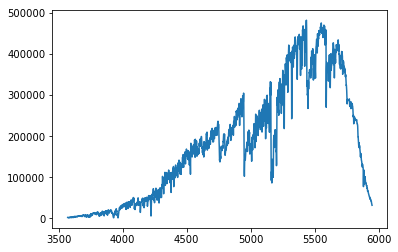

In [32]:
plt.plot(desi.camera_output[0]['wavelength'],desi.camera_output[0]['num_source_electrons'][:,0])

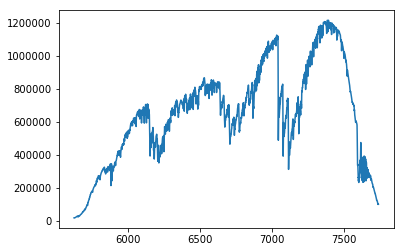

In [203]:
plt.plot(desi.camera_output[1]['wavelength'],desi.camera_output[1]['num_source_electrons'][:,0])

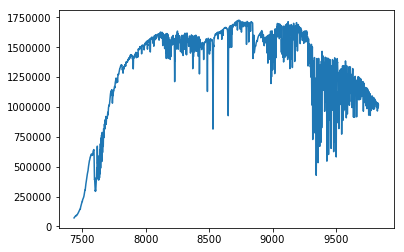

In [204]:
plt.plot(desi.camera_output[2]['wavelength'],desi.camera_output[2]['num_source_electrons'][:,0])

This is source photons into the fiber

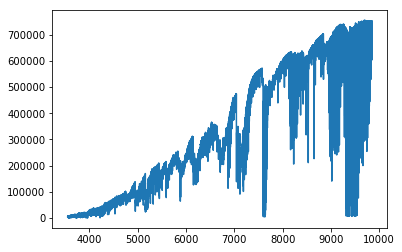

In [214]:
plt.plot(desi.simulated['wavelength'],desi.simulated['num_source_photons'][:,0])

The difference in y-axis is just the wavelength binning.  desi.simulated uses 0.1A bins, camera_output uses 0.5 A bins.  <br> 
All three DESI cameras are very close to 0.5 A/pix, so photons/0.5A is equivalent to photons/pix.

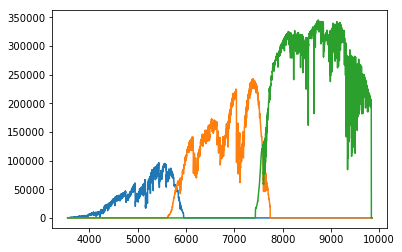

In [219]:
plt.plot(desi.simulated['wavelength'],desi.simulated['num_source_electrons_b'][:,0])
plt.plot(desi.simulated['wavelength'],desi.simulated['num_source_electrons_r'][:,0])
plt.plot(desi.simulated['wavelength'],desi.simulated['num_source_electrons_z'][:,0])

In [220]:
print(desi.simulated['wavelength'][0:5])
print(desi.camera_output[0]['wavelength'][0:5])

wavelength
 Angstrom 
----------
    3550.0
    3550.1
    3550.2
    3550.3
    3550.4
wavelength
 Angstrom 
----------
    3569.2
    3569.7
    3570.2
    3570.7
    3571.2


In [224]:
desi.camera_output[2].meta

{'name': 'z', 'num_fibers': 100, 'pixel_size': <Quantity 0.5 Angstrom>}

MAG is r magnitude

In [34]:
starmetas['MAG'][0]

12.262317

In [35]:
greenobje = np.sum(desi.camera_output[0]['num_source_electrons'],axis=0)
redobje = np.sum(desi.camera_output[1]['num_source_electrons'],axis=0)
irobje = np.sum(desi.camera_output[2]['num_source_electrons'],axis=0)

In [36]:
greenobje.shape

(100,)

In [37]:
greenskye = np.sum(desi.camera_output[0]['num_sky_electrons'],axis=0)
redskye = np.sum(desi.camera_output[1]['num_sky_electrons'],axis=0)
irskye = np.sum(desi.camera_output[2]['num_sky_electrons'],axis=0)

In [38]:
rmag = starmetas['MAG']

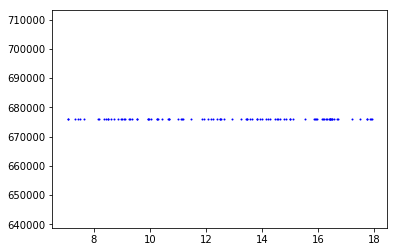

In [39]:
plt.plot(rmag,redskye,'bo',mew=0,ms=2)

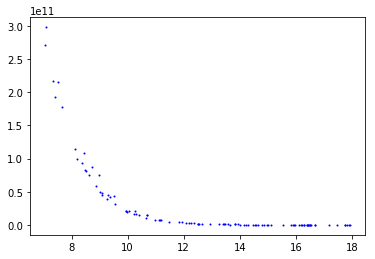

In [40]:
plt.plot(rmag,redobje,'bo',mew=0,ms=2)

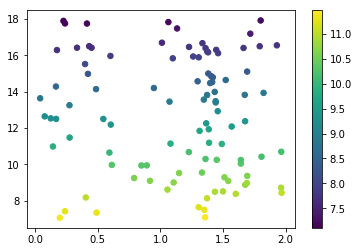

In [151]:
plt.scatter(gmr,rmag,c=np.log10(redobje),s=30)
plt.colorbar()

In [152]:
np.arange(22)/2.+7.5

array([  7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
        12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ,  15.5,  16. ,
        16.5,  17. ,  17.5,  18. ])

In [157]:
print(desi.camera_output[0]['num_source_electrons'][8,0:5]/desi.observation.exposure_time)

[  1.12460131  11.09756952   0.07582856   0.21535071  65.30858922] 1 / s


In [158]:
print(desi.camera_output[0]['num_source_electrons'][8,0:5])

num_source_electrons
--------------------
       1124.60130879
       11097.5695197
        75.828562801
       215.350714387
       65308.5892191


In [164]:
foo = np.sum(desi.camera_output[0]['num_source_electrons'],axis=0)/1000.

In [165]:
foo[8]

188315105.91790879

In [166]:
foo = np.sum(desi.camera_output[0]['num_source_electrons'],axis=0)

In [167]:
foo[8]

188315105917.90878

In [237]:
# Tabulate the photon count rate in each of the three spectrograph channels for sky and source.
# photons detected is the same as electrons. Specsim uses "electrons" for "detected photons"
# average objects in magnitude bins over whatever other properties are in the sample
# for stars, that averages over color/SED/spectral type.  
# your responsibility to check that the bin boundaries hard-coded below are reasonable.
# Fix the code to pass those as ranges args or compute on the fly if it upsets you. 
# This is only as realistic as the input.  The color distribution computed in this notebook 
# (2017 December) would be improved if it were drawn from a mock or real data. This is 
# just a random sampling of the template library for g-r > 0. 
def countstable(camoutlist, metadata,exptime):
    greenskyerate = (np.mean(camoutlist[0]['num_sky_electrons'],axis=0))/exptime
    redskyerate = (np.mean(camoutlist[1]['num_sky_electrons'],axis=0))/exptime
    irskyerate = (np.mean(camoutlist[2]['num_sky_electrons'],axis=0))/exptime
    greenobjerate = (np.mean(camoutlist[0]['num_source_electrons'],axis=0))/exptime
    redobjerate = (np.mean(camoutlist[1]['num_source_electrons'],axis=0))/exptime
    irobjerate = (np.mean(camoutlist[2]['num_source_electrons'],axis=0))/exptime
    rmag = starmetas['MAG']
    #redobjerate = redobjetot/exptime
    # 7 - 17.5, steps 0.5
    hilist = np.arange(22)/2.+7.
    # 7.5 - 18,steps 0.5
    lowlist = np.arange(22)/2.+7.5
    nbin = len(hilist)
    # all sky counts are the same, so no need to tabulate by magnitude
    print('     dark sky photons/sec/pix')
    print('{0:15} {1:10} {2:10}'.format('   green','red','IR'))
    print('{0:10.3} {1:10.3} {2:10.3}'.format(greenskyerate[0],redskyerate[0],irskyerate[0]))
    print(' ')
    print('{0:20} {1:30}'.format('    r mag','Object photons/sec/pix'))
    print('{0:5} -{1:7}  {2:10} {3:10} {4:10}'.format('r min','r max','green','red','IR'))
    for i in range(nbin):
        bidx = (rmag > hilist[i]) &(rmag < lowlist[i])
        bobjred = np.mean(redobjerate[bidx])
        bobjgreen = np.mean(greenobjerate[bidx])
        bobjir = np.mean(irobjerate[bidx])
        print('{0:4}  {1:5}  {2:10.3} {3:10.3} {4:10.3}'.format(hilist[i],lowlist[i],bobjgreen,bobjred,bobjir))
        # print below for making wiki-friendly tables
        #print('||{0:4} || {1:5} || {2:10.3} || {3:10.3} || {4:10.3}||'.format(hilist[i],lowlist[i],bobjgreen,bobjred,bobjir))
       


In [209]:
rmag[8]

7.4216757

In [234]:
countstable(desi.camera_output, starmetas, 1000.)

     dark sky photons/sec/pix
   green        red        IR        
    0.0905       0.16       0.43
 
    r mag            Object photons/sec/pix        
r min -r max    green      red        IR        
 7.0    7.5    3.77e+04   5.78e+04   6.03e+04
 7.5    8.0     1.4e+04   4.65e+04    7.7e+04
 8.0    8.5    7.97e+03   2.36e+04   4.28e+04
 8.5    9.0     4.1e+03   1.78e+04   4.53e+04
 9.0    9.5    3.53e+03   1.06e+04    1.8e+04
 9.5   10.0    2.38e+03   6.39e+03    1.3e+04
10.0   10.5    9.87e+02   4.25e+03   9.44e+03
10.5   11.0    1.08e+03   2.82e+03   7.13e+03
11.0   11.5    6.19e+02   1.55e+03   2.27e+03
11.5   12.0    2.42e+02   1.09e+03   3.61e+03
12.0   12.5    2.13e+02   6.57e+02   1.23e+03
12.5   13.0    3.01e+02   4.19e+02   5.97e+02
13.0   13.5        91.9   2.06e+02   2.82e+02
13.5   14.0        57.4   1.56e+02   2.96e+02
14.0   14.5        51.6       90.2   1.11e+02
14.5   15.0        21.1       65.7   1.25e+02
15.0   15.5        12.0       49.8   1.05e+02
15.5   16.0   

In [236]:
countstable(desi.camera_output, starmetas, 1000.)

     dark sky photons/sec/pix
   green        red        IR        
    0.0905       0.16       0.43
 
    r mag            Object photons/sec/pix        
r min -r max    green      red        IR        
|| 7.0 ||   7.5 ||   3.77e+04 ||   5.78e+04 ||   6.03e+04||
|| 7.5 ||   8.0 ||    1.4e+04 ||   4.65e+04 ||    7.7e+04||
|| 8.0 ||   8.5 ||   7.97e+03 ||   2.36e+04 ||   4.28e+04||
|| 8.5 ||   9.0 ||    4.1e+03 ||   1.78e+04 ||   4.53e+04||
|| 9.0 ||   9.5 ||   3.53e+03 ||   1.06e+04 ||    1.8e+04||
|| 9.5 ||  10.0 ||   2.38e+03 ||   6.39e+03 ||    1.3e+04||
||10.0 ||  10.5 ||   9.87e+02 ||   4.25e+03 ||   9.44e+03||
||10.5 ||  11.0 ||   1.08e+03 ||   2.82e+03 ||   7.13e+03||
||11.0 ||  11.5 ||   6.19e+02 ||   1.55e+03 ||   2.27e+03||
||11.5 ||  12.0 ||   2.42e+02 ||   1.09e+03 ||   3.61e+03||
||12.0 ||  12.5 ||   2.13e+02 ||   6.57e+02 ||   1.23e+03||
||12.5 ||  13.0 ||   3.01e+02 ||   4.19e+02 ||   5.97e+02||
||13.0 ||  13.5 ||       91.9 ||   2.06e+02 ||   2.82e+02||
||13.5 ||  14.0 